In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
dir = 'C:\\Users\\USER\\Desktop\\2022\\수업\\2학기\\기계학습-김동일 교수님\\실습1\\'

In [7]:
moon = pd.read_csv(f'{dir}/moon.csv')

In [8]:
moon

,x1,x2,y
0,1.565984,-0.308789,1
1,0.055259,-0.106020,1
2,-0.643060,0.743222,0
3,-0.818950,0.694121,0
4,0.698939,-0.427607,1
...,...,...,...
1995,0.845353,0.597956,0
1996,1.468403,-0.387790,1
1997,1.727185,-0.296954,1
1998,-0.294546,0.916168,0


In [9]:
X = moon.iloc[:, :-1]
y = moon.iloc[:, -1]

In [10]:
x1 = X.x1
x2 = X.x2

<h3>Data 확인</h3>

In [11]:
y.value_counts()

1    1000
0    1000
Name: y, dtype: int64

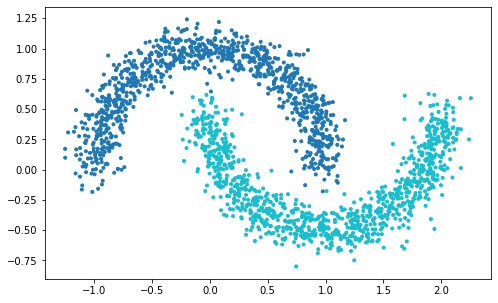

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(x1, x2, c = y, marker = '.',cmap = 'tab10')

In [13]:
x1_0 = moon.iloc[np.where(y == 0)].x1
x2_0 = moon.iloc[np.where(y == 0)].x2
y_0 = moon.iloc[np.where(y == 0)].y

In [14]:
x1_1 = moon.iloc[np.where(y == 1)].x1
x2_1 = moon.iloc[np.where(y == 1)].x2
y_1 = moon.iloc[np.where(y == 1)].y

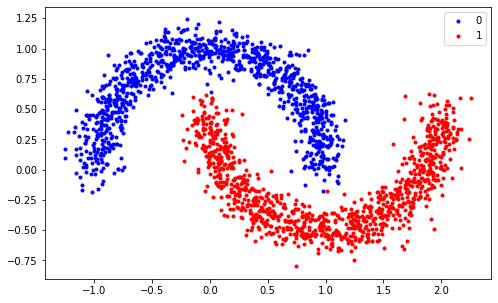

In [15]:
plt.figure(figsize=(8,5))
plt.scatter(x1_0, x2_0, c='b', marker='.', label='0')
plt.scatter(x1_1, x2_1, c='r', marker = '.', label='1')
plt.legend()

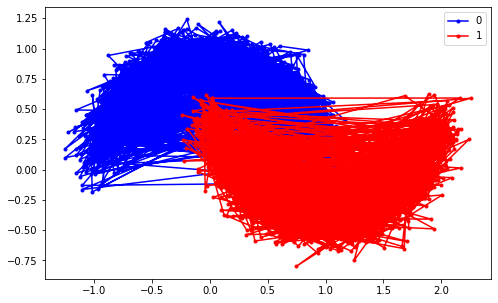

In [16]:
plt.figure(figsize=(8,5))
plt.plot(x1_0, x2_0, c='b', marker='.', label='0')
plt.plot(x1_1, x2_1, c='r', marker = '.', label='1')
plt.legend()

<h2>Bayesian 실습</h2>

In [17]:
from sklearn.naive_bayes import GaussianNB as GNB

In [18]:
model = GNB()

In [19]:
model.fit(X, y)

GaussianNB()

In [20]:
model.predict(X)

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

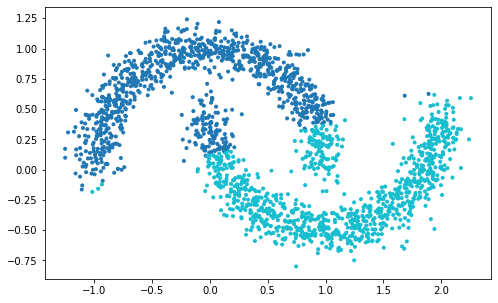

In [21]:
plt.figure(figsize=(8,5))
plt.scatter(
    x1, x2,
    c = model.predict(X),
    marker = '.',
    cmap = 'tab10'
)

In [22]:
model = GNB(priors = [.5, .5])

In [23]:
model.fit(X, y)

GaussianNB(priors=[0.5, 0.5])

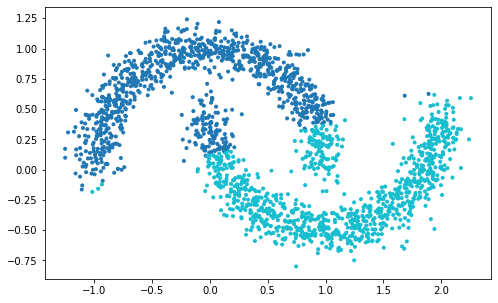

In [24]:
plt.figure(figsize=(8,5))
plt.scatter(
    x1, x2,
    c = model.predict(X),
    marker = '.',
    cmap = 'tab10'
)

<h2>0번 클래스에 더 영향을 끼치도록</h2>

In [25]:
model = GNB(priors = [.99, .01])

In [26]:
model.fit(X, y)

GaussianNB(priors=[0.99, 0.01])

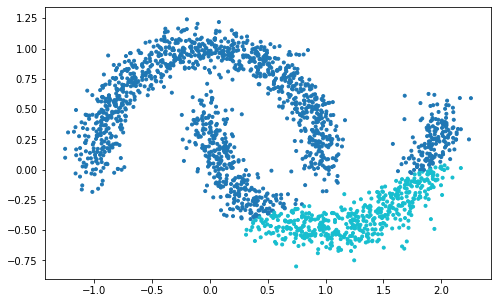

In [27]:
plt.figure(figsize=(8,5))
plt.scatter(
    x1, x2,
    c = model.predict(X),
    marker = '.',
    cmap = 'tab10'
)

<h2>1번 클래스에 더 영향을 끼치도록</h2>

In [28]:
model = GNB(priors = [0.3, 0.7])

In [29]:
model.fit(X, y)

GaussianNB(priors=[0.3, 0.7])

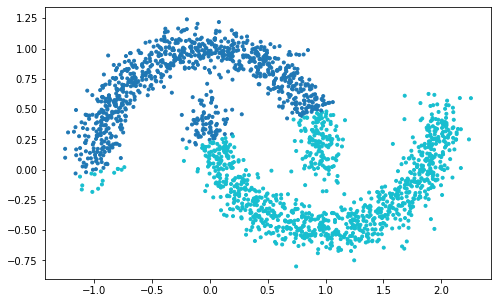

In [30]:
plt.figure(figsize=(8,5))
plt.scatter(
    x1, x2,
    c = model.predict(X),
    marker = '.',
    cmap = 'tab10'
)

<h1>Assignment</h1>
1. Iris data - 필요없는 col 삭제 및 Label Encoding으로 Target 전처리
<br>2. 전처리된 데이터셋으로, Bayesian 실습
<br>2-1. 모든 prior를 변경해보면서, 예측된 값이 어떻게 변화하는지 확인

In [31]:
dir = 'C:\\Users\\USER\\Desktop\\2022\\수업\\2학기\\기계학습-김동일 교수님\\실습1\\'

In [32]:
iris_data = pd.read_csv(f'{dir}iris.csv')

In [33]:
# ---- 1. 데이터 전처리 및 Input, Target 분리

X = iris_data.iloc[:,1:-1]
y = iris_data.iloc[:,-1]


In [34]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)

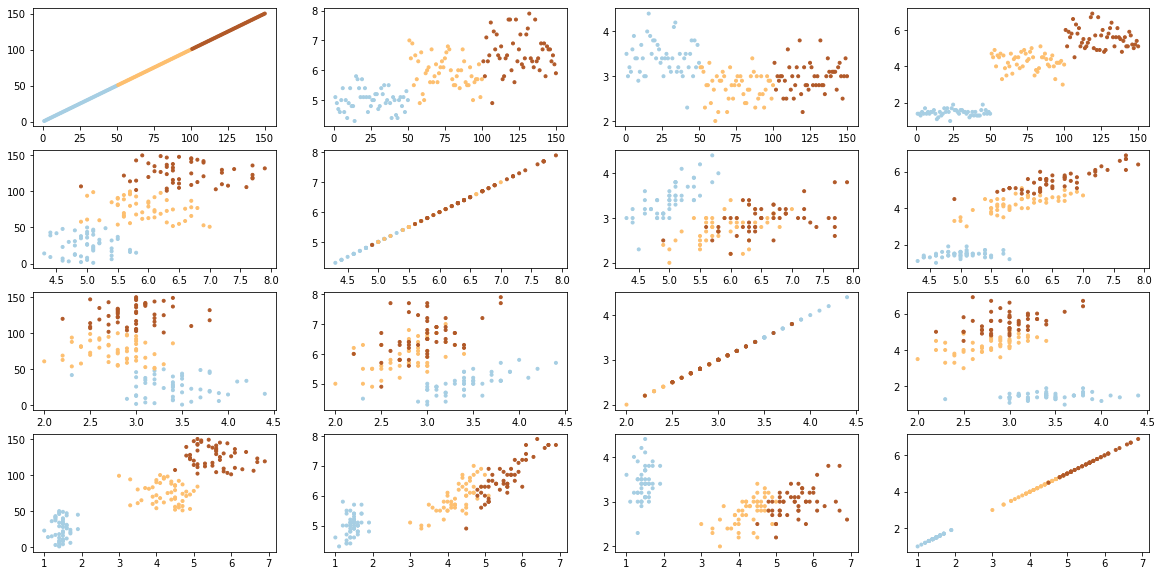

In [35]:
from itertools import product
pairs = product(range(X.shape[1]), range(X.shape[1]))

fig, axes = plt.subplots(4, 4, figsize=(20, 10))
for c1, c2 in pairs:
    # print(c1, c2)
    axes[c1][c2].scatter(iris_data[iris_data.columns[c1]], iris_data[iris_data.columns[c2]], c = y ,marker = '.',cmap = 'Paired')

In [36]:
result = []

In [37]:
# 2. Bayesian model 실습
# 모든 클래스 (3개)의 prior를 변경해보면서, 예측된 값 변화 확인
# result에 prior가 변경된 model 예측값 append하기
from sklearn.naive_bayes import GaussianNB as GNB

model = GNB()
model.fit(X,y)
result.append(model.predict(X))

model = GNB(priors=[.01,.01,.98])
model.fit(X,y)
result.append(model.predict(X))

model = GNB(priors=[.01,.98,.01])
model.fit(X,y)
result.append(model.predict(X))

model = GNB(priors=[.98,.01,.01])
model.fit(X,y)
result.append(model.predict(X))

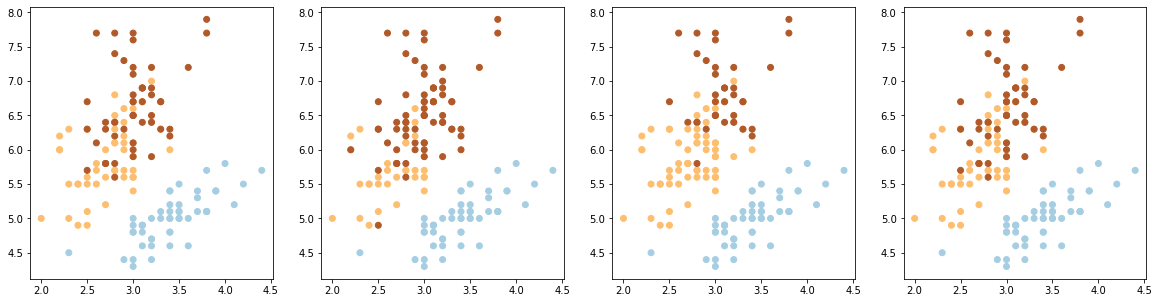

In [38]:
# 3. 결과 확인
fig, axes = plt.subplots(1, 4, figsize=(20,5))
for i in range(4):
    axes[i].scatter(iris_data.SepalWidthCm, iris_data.SepalLengthCm, c = result[i], marker = 'o',cmap = 'Paired')

#### 왜 class 0 와 class 1 은 prior 차이를 줘도 차이가 없을까.

#### 지난 이론 수업에서 슬라이트33을 보자

#### 교집합이 있을때, 가중치의 변화에 따라 분포가 달라진다.

#### 하지만, 교집합이 없다면? 특히, class0 와 class1,2 는 서로 교집합이 없는듯 하다. 